#Classificação de Lesões de Cavalos


# Carregar base de Dados
Importação de Librarias 

In [1]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Conectar ao Github para carregar os dados

In [2]:
!git clone https://github.com/fr3dyos/Trabalho-de-Aula-DM.git

Cloning into 'Trabalho-de-Aula-DM'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [3]:
data1 = pd.read_csv('Trabalho-de-Aula-DM/horse.csv')
print(data1.head())
print(data1.describe())

  surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
0      no  adult           530101  ...         0         0       no
1     yes  adult           534817  ...         0         0       no
2      no  adult           530334  ...         0         0      yes
3     yes  young          5290409  ...         0         0      yes
4      no  adult           530255  ...         0         0       no

[5 rows x 28 columns]
       hospital_number  rectal_temp  ...     lesion_2     lesion_3
count     2.990000e+02   239.000000  ...   299.000000   299.000000
mean      1.087733e+06    38.168619  ...    90.528428     7.387960
std       1.532032e+06     0.733744  ...   650.637139   127.749768
min       5.184760e+05    35.400000  ...     0.000000     0.000000
25%       5.289040e+05    37.800000  ...     0.000000     0.000000
50%       5.303010e+05    38.200000  ...     0.000000     0.000000
75%       5.347360e+05    38.500000  ...     0.000000     0.000000
max       5.305629e+06    40.8000

In [4]:
data_test = pd.read_csv('Trabalho-de-Aula-DM/horseTest.csv')
print(data_test.head())
print(data_test.describe())

  surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
0      no  adult                1  ...         0         0       no
1      no  adult                2  ...         0         0       no
2     yes  adult                3  ...         0         0       no
3      no  young                4  ...         0         0      yes
4     yes  adult                5  ...         0         0      yes

[5 rows x 28 columns]
       hospital_number  rectal_temp  ...     lesion_2     lesion_3
count        89.000000    73.000000  ...    89.000000    89.000000
mean         45.000000    38.175342  ...   218.483146    24.820225
std          25.836021     0.808768  ...  1082.038807   234.153532
min           1.000000    36.000000  ...     0.000000     0.000000
25%          23.000000    37.800000  ...     0.000000     0.000000
50%          45.000000    38.100000  ...     0.000000     0.000000
75%          67.000000    38.600000  ...     0.000000     0.000000
max          89.000000    40.8000

In [5]:
import random
from scipy.stats import norm

Color = ['#1a1a1a','#fcc000']
cpal = sns.color_palette(Color , as_cmap=True)
Color2 = ['#fcc000','#1a1a1a']

def cmap_creator(Color):
  cm = []
  for C in Color:
    r = int(C[1:3], 16)/255
    g = int(C[3:5], 16)/255
    b = int(C[5:], 16)/255
    cm.append((r,g,b))
  R = np.linspace(cm[0][0],cm[1][0],num=100)
  G = np.linspace(cm[0][1],cm[1][1],num=100)
  B = np.linspace(cm[0][2],cm[1][2],num=100)
  cm = []
  for r,g,b in zip(R,G,B):
    cm.append((r,g,b))
  return cm

cmap=cmap_creator(Color2)

def balance_column(data,column):
  plt.figure(figsize=(5,5))
  graph = data[column].value_counts().plot(kind='bar',
                                      figsize=(5,5),
                                      title='Balanceamento '+column ,color = Color)
  bars = data[column].value_counts()
  print('\n\tBalanceamento',column)
  print(bars)
  for idx,bar in enumerate(bars):
    graph.text(x=idx-0.05,y=bar+2,s=bar)

  
def balance_versus(data,colclass,column):
  plt.figure(figsize=(5,5))
  sns.countplot(data=data, x=column, hue=colclass, palette=cpal)
  plt.title('Balanceamento ' + column + ' vs ' + colclass)
  plt.show()

def balance_versus_scatterer(data,column1,column2):
  plt.figure(figsize=(5,5))
  plt.scatter(data = data[data.result == 'died'], x=column1, y=column2, label='died',color = Color[0], alpha=0.8)
  plt.scatter(data = data[data.result == 'lived'], x=column1, y=column2, label='lived',color = Color[1], alpha=0.8)
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Gráfico de dispersão '+column1+' vs '+column2)
  plt.legend()
  plt.show()

def gauss_hist(data,column):
  sns.displot(data=data , x=col , hue = 'result',kde = True, palette = Color, height=5, aspect=1.2,alpha =0.75)
  plt.title('Gráfico de sino de gauss '+column)
  plt.show()

# Análise exploratória

## Balanceamento
Juntando ambas Bases de Dados para terem o mesmo tratamento, serão divididas mais a frente. 

*   *lived*:   231  (59.5%)
*   *died*:     157 (40.5%)
*   TOTAL:      388 


## Considerações:


*  **A eutanasia** foi considerada como que o cavalo '*morreu*', pois finalmente o cavalo morre como resultado da sua lesão

*  Criou se uma nova coluna '*result*' e eliminou-se a coluna '*outcome*'.

*  Inicialmente tem 27 colunas de Atributos e uma classe.

*  Deacordo com uma inspeção inicial o atributos hospital_number, respiratory_rate e cp_data não repesentam informação relevante para a solução do problema, e não serão tidos em conta.



In [6]:
# Concatenação das bases
print('Tamanho data:',data1.shape,'\t Tamanho data test:',data_test.shape)
data = pd.concat([data1, data_test]) 
print('Tamanho data concatenada:',data.shape)


# Criação da coluna result e eliminação da outcome
data['result']=np.where(data['outcome']=='euthanized','died',data['outcome'])
data = data.drop(columns=['outcome'])


data = data.drop(columns=['hospital_number','cp_data','respiratory_rate'])
# Resetando o index para evitar problemas mais a frente.
data = data.reset_index()

Tamanho data: (299, 28) 	 Tamanho data test: (89, 28)
Tamanho data concatenada: (388, 28)


Lista de colunas com itens nulos

In [7]:
col_null = data.isnull().sum()
print(col_null)
print('Quantidade de atributos:',len(data.columns)-1,'\tClasse:',1)

print('\n\n\tColunas com muitos valores nulos\n')
print(col_null[col_null>= (data.shape[0]/2)])

index                      0
surgery                    0
age                        0
rectal_temp               76
pulse                     29
temp_of_extremities       69
peripheral_pulse          88
mucous_membrane           57
capillary_refill_time     36
pain                      67
peristalsis               54
abdominal_distention      68
nasogastric_tube         127
nasogastric_reflux       134
nasogastric_reflux_ph    321
rectal_exam_feces        136
abdomen                  153
packed_cell_volume        36
total_protein             43
abdomo_appearance        209
abdomo_protein           258
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
result                     0
dtype: int64
Quantidade de atributos: 25 	Classe: 1


	Colunas com muitos valores nulos

nasogastric_reflux_ph    321
abdomo_appearance        209
abdomo_protein           258
dtype: int64


Tendo em conta que a quantidade total de casos é 388, e as colunas 'nasogastric_reflux_ph', 'abdomo_appearance' e 'abdomo_protein' contém mais de 200 dados nulos, elas serão eliminadas pois a quantidade de dados artificiais é alta e tiraria fiabilidade no modelo.

In [8]:
data = data.drop(columns=col_null[col_null>= (data.shape[0]/2)].index)

Eliminando filas com 50% de dados nulos o mais

In [9]:
row_null = data.isnull().sum(axis=1)
data = data.drop(row_null[row_null>=((len(data.columns)-1)/2)].index)

(366, 23)

	Balanceamento result
lived    217
died     149
Name: result, dtype: int64


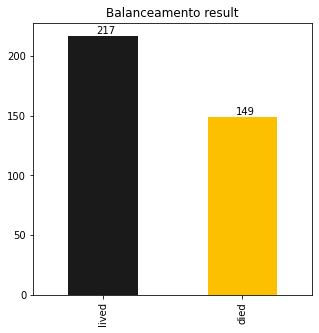

In [10]:
print(data.shape)
balance_column(data,'result')

## Separação de Teste e Treino

In [11]:
# semente para reprodução de resultados
seed=77

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'result'], data['result'], test_size=0.2, stratify=data['result'], random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (292, 22)
shape input de teste:  (74, 22)
shape output de treino:  (292,)
shape output de teste:  (74,)




	 Balanceamento Treino



	Balanceamento result
lived    173
died     119
Name: result, dtype: int64


	 Balanceamento Teste



	Balanceamento result
lived    44
died     30
Name: result, dtype: int64


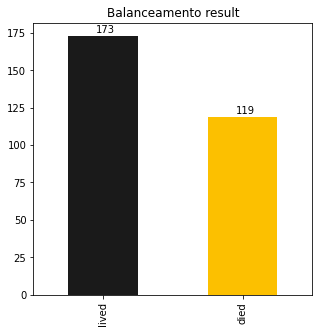

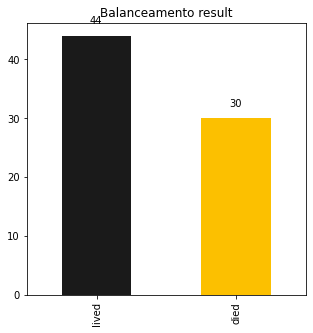

In [12]:
print('\n\n\t Balanceamento Treino\n\n')
balance_column(pd.concat([X_train, y_train], axis=1),'result')
print('\n\n\t Balanceamento Teste\n\n')
balance_column(pd.concat([X_test, y_test], axis=1),'result')

Retirando valores nulos

In [13]:
# Trasnformar inputs categóricos em numérico: dummy coding
X_train =  X_train.reset_index()
X_train = X_train.drop(columns=['index'])
X_train = X_train.drop(columns=['level_0'])

X_test =  X_test.reset_index()
X_test = X_test.drop(columns=['index'])
X_test = X_test.drop(columns=['level_0'])

cat_train = X_train.loc[:,X_train.dtypes ==object]
num_train = X_train.loc[:,X_train.dtypes !=object]

cat_test = X_test.loc[:,X_test.dtypes ==object]
num_test = X_test.loc[:,X_test.dtypes !=object]

cat_test = cat_test.fillna(cat_train.mode().iloc[0])
cat_train = cat_train.fillna(cat_train.mode().iloc[0])

num_test = num_test.fillna(num_train.mean().iloc[0])
num_train = num_train.fillna(num_train.mean().iloc[0])

X_train = pd.concat([cat_train, num_train], axis=1)
X_test = pd.concat([cat_test, num_test], axis=1)

col_null = X_train.isnull().sum()
print(col_null)
col_null = X_test.isnull().sum()
print(col_null)

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
surgical_lesion          0
rectal_temp              0
pulse                    0
packed_cell_volume       0
total_protein            0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64
surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
surgical_lesion          0
rectal_temp              0
pulse          

## Revisão de cada atributo

Nesta secção são revisados os dados e tentar solucionar como preencher os valores nulos de cada coluna. 
Na maioria dos casos os dados foram colocados em valores considerados normais.

A proporção entre sobrevivente e morto muda apenas ligeiramente de cavalos com sirugia a sem sirugia. porém não é significativo.

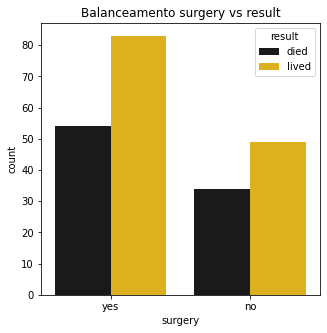

In [14]:
col = 'surgery'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)


Atributo age.
Sem dados nulos. Pode-se inferir que a maioria de cavalos que não sobreviveram são adultos, porém, a quantidade de amostragem de animais jovens não é suficiente para fazer uma afirmação.

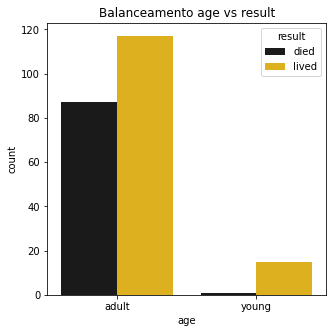

In [15]:
col = 'age'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)


No analise gráfico não apresenta um dado obvio como separação entre classes. 

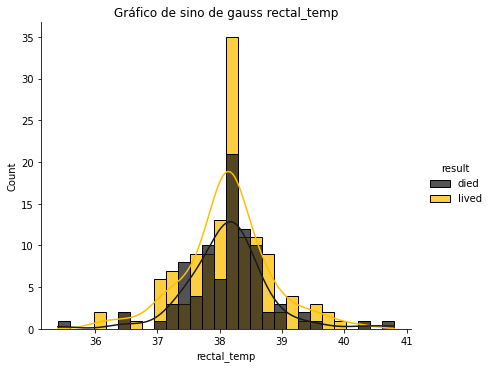

In [16]:
col='rectal_temp'
gauss_hist(pd.concat([X_train, y_train], axis=1),col)

Atributo pulse.
O analise gráfico apresenta sim um dado como possível separação entre classes. 
Neste caso os dados apontam que a proporção de cavalos com pulso alto e morreram é maior do que ao contrário.

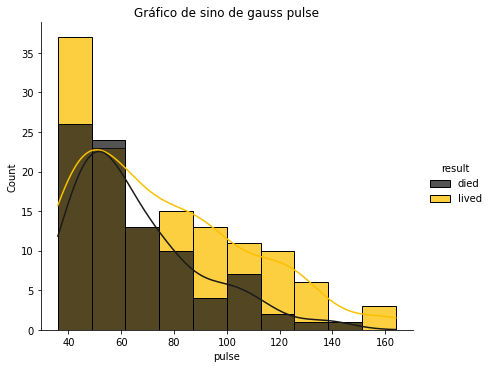

In [17]:
col = 'pulse'
gauss_hist(pd.concat([X_train, y_train], axis=1),col)

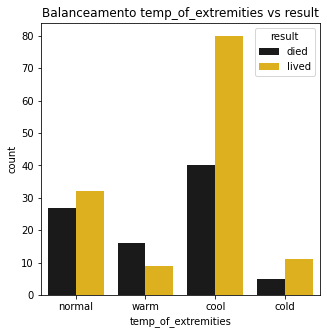

In [18]:
col = 'temp_of_extremities'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

Ao igual que na temperatura das extremidades incrementa elevam o risco de morte em proporçao. Quantidade de dados da categoria pode não ser significativa

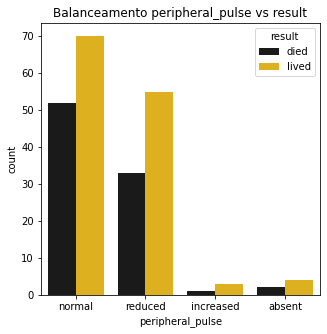

In [19]:
col='peripheral_pulse'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

Valores extremos de dark_cyanotic parecem ser atenuantes de risco. 

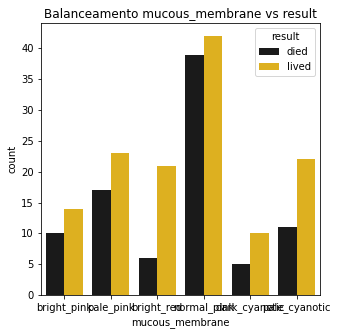

In [20]:
col='mucous_membrane'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

No Atributo capillary_refill_time, eliminou-se uma categoria pois na informação anexa inclui valores 'iguais e superiores a 3 segundos' como uma classificação só. Aparentemente valores menores a 3 segundos aumentam a probabilidade de sobreviver. 

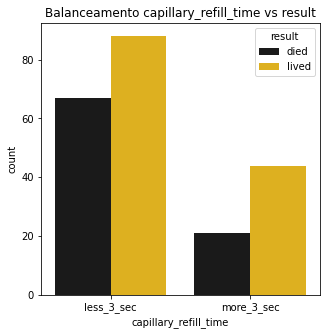

In [21]:
col='capillary_refill_time'
X_train[col] = X_train[col].replace('3', 'more_3_sec')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)
X_test[col] = X_test[col].replace('3', 'more_3_sec')


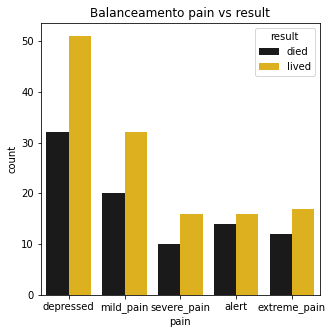

In [22]:
col='pain'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

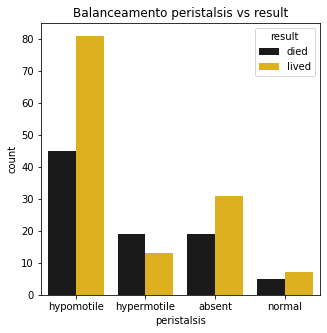

In [23]:
col='peristalsis'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

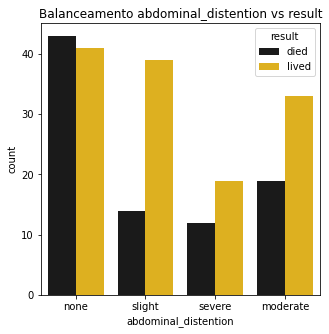

In [24]:
col='abdominal_distention'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

Apesar de ter bastantes valores sinteticos a proporção entre viveu e morreu é a maior na categoria slight(leve).

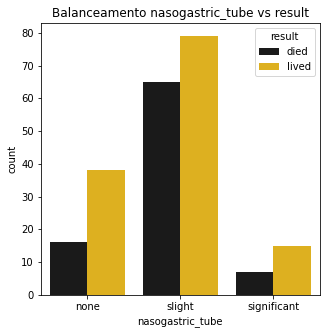

In [25]:
col='nasogastric_tube'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

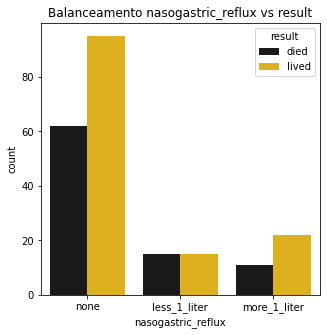

In [26]:
col='nasogastric_reflux'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

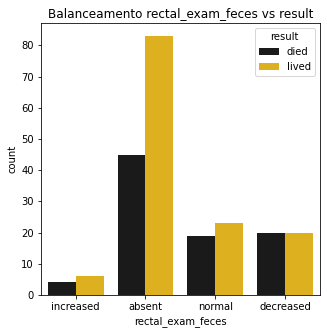

In [27]:
col='rectal_exam_feces'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

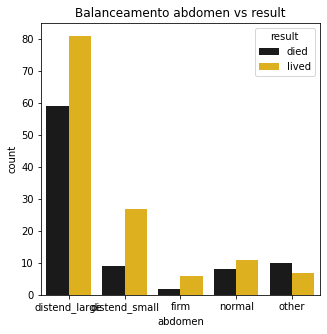

In [28]:
col='abdomen'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

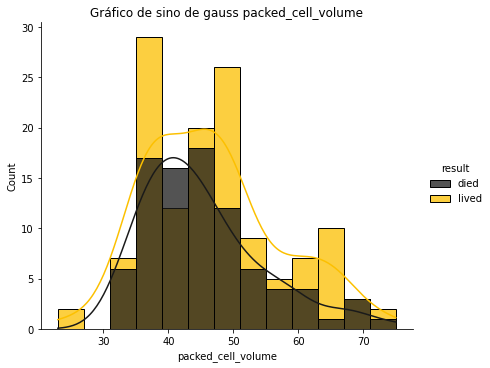

In [29]:
col='packed_cell_volume'
gauss_hist(pd.concat([X_train, y_train], axis=1),col)

Neste atributo não tem uma diferença significatva quando dsicriminada pela classe.

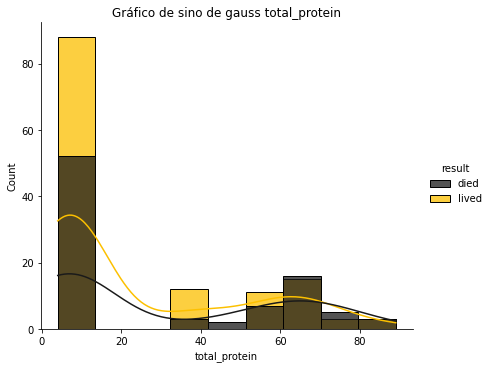

In [30]:
col='total_protein'
gauss_hist(pd.concat([X_train, y_train], axis=1),col)

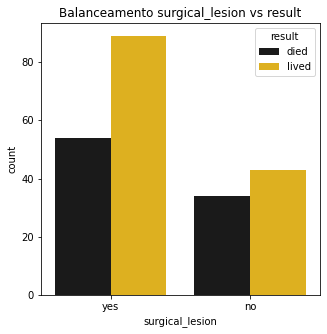

In [31]:
col = 'surgical_lesion'
balance_versus(pd.concat([X_train, y_train], axis=1),'result',col)

Na comparação bidimensional entre os 4 atributos numéricos não se encontra um padrão obvio para separar os dados nas classes.

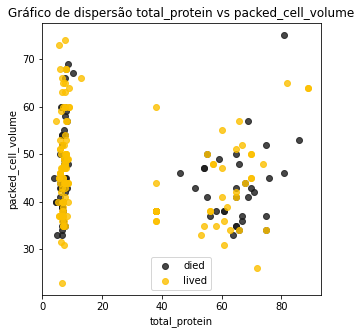

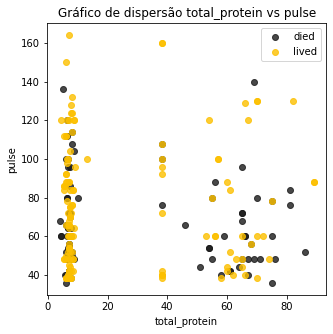

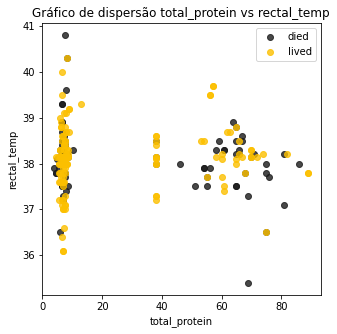

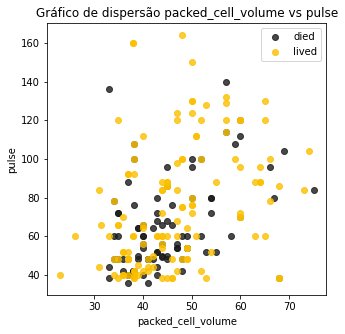

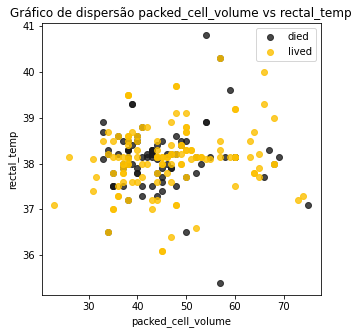

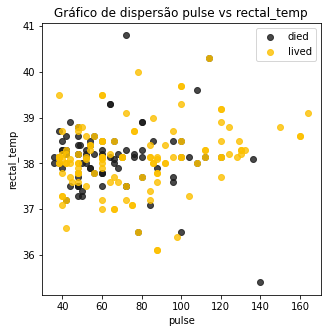

In [32]:
cols=['total_protein' ,'packed_cell_volume', 'pulse','rectal_temp']

for i in range(len(cols)):
  for j in  range(len(cols)):
    if j > i :
      balance_versus_scatterer(pd.concat([X_train, y_train], axis=1),cols[i],cols[j])


No caso dos atributos de lesão 1,2 e 3, temos o desafio que a informação esta codificada. Foi seguido o padrão para separar a informação em 4 colunas por cada lesão. Podemos ver que a coluna de lesão 1 contia informação mais relevante do que as outras 2.  

In [33]:
def splitlv(V):
  a = np.array([ v[0] for v in V])
  b = np.array([ v[1] for v in V])
  c = np.array([ v[2] for v in V])
  d = np.array([ v[3] for v in V])
  return a,b,c,d

def lesion_decode(L):
  V=[]
  for l in L:
    s = str(l)
    if l < 10000:
      if l == 0 :
        v = [0,0,0,0]
      else:
        if len(s) > 3:
          v = [int(s[-4]),int(s[-3]),int(s[-2]),int(s[-1])]
        else:
          v = [0,int(s[-3]),int(s[-2]),int(s[-1])]
    else:
      v=''
      if int(s[0:2]) == 11:
          v = [int(s[0:2]),int(s[-3]),int(s[-2]),int(s[-1])]
      elif  int(s[-2:]) == 10 :
          v = [int(s[-5]),int(s[-4]),int(s[-3]),int(s[-2:])]
      else:
          v = [int(s[-5]),int(s[-4]),int(s[-3]),int(s[-2:])]
    V.append(v) 

  return V


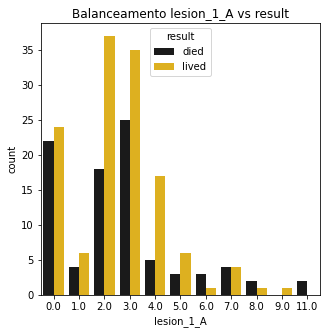

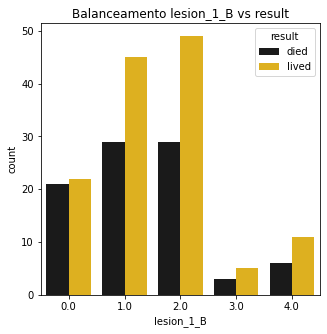

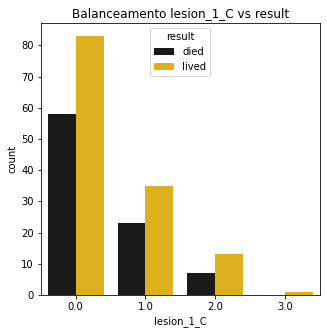

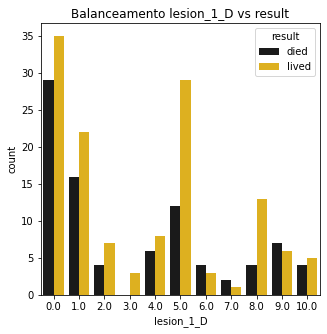

In [34]:
lesion = 'lesion_1'
L = lesion_decode(X_train[lesion])
A,B,C,D = splitlv(L)
X_train[lesion+'_A'] = A
X_train[lesion+'_B'] = B
X_train[lesion+'_C'] = C
X_train[lesion+'_D'] = D

balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_A')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_B')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_C')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_D')

L = lesion_decode(X_test[lesion])
A,B,C,D = splitlv(L)
X_test[lesion+'_A'] = A
X_test[lesion+'_B'] = B
X_test[lesion+'_C'] = C
X_test[lesion+'_D'] = D

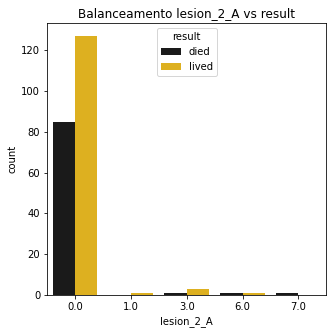

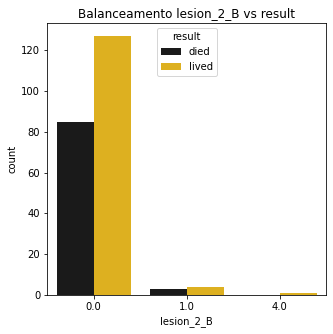

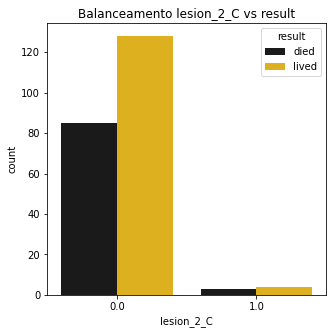

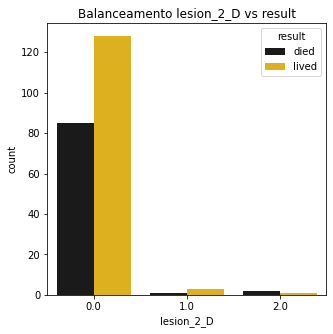

In [35]:
lesion = 'lesion_2'
L = lesion_decode(X_train[lesion])
A,B,C,D = splitlv(L)
X_train[lesion+'_A'] = A
X_train[lesion+'_B'] = B
X_train[lesion+'_C'] = C
X_train[lesion+'_D'] = D

balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_A')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_B')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_C')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_D')

L = lesion_decode(X_test[lesion])
A,B,C,D = splitlv(L)
X_test[lesion+'_A'] = A
X_test[lesion+'_B'] = B
X_test[lesion+'_C'] = C
X_test[lesion+'_D'] = D

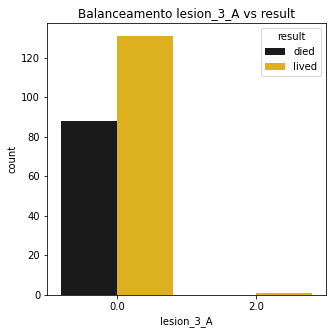

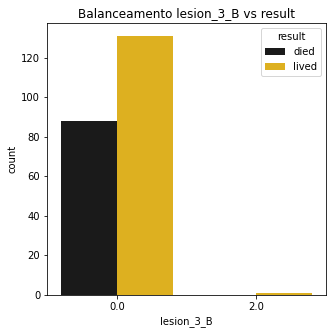

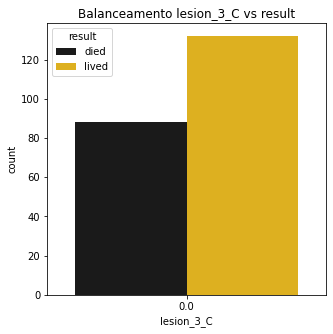

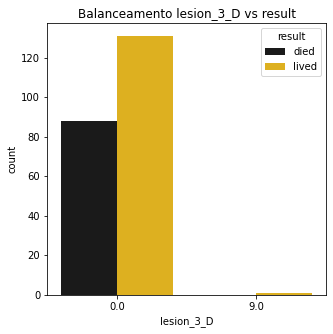

In [36]:
lesion = 'lesion_3'
L = lesion_decode(X_train[lesion])
A,B,C,D = splitlv(L)
X_train[lesion+'_A'] = A
X_train[lesion+'_B'] = B
X_train[lesion+'_C'] = C
X_train[lesion+'_D'] = D

balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_A')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_B')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_C')
balance_versus(pd.concat([X_train, y_train], axis=1),'result',lesion+'_D')

L = lesion_decode(X_test[lesion])
A,B,C,D = splitlv(L)
X_test[lesion+'_A'] = A
X_test[lesion+'_B'] = B
X_test[lesion+'_C'] = C
X_test[lesion+'_D'] = D

Eliminadas as colunas lesão 1,2 e 3. Pois a informação encontra-se em outras colunas.

In [37]:
X_train = X_train.drop(columns=['lesion_3', 'lesion_2' , 'lesion_1' ])
X_test = X_test.drop(columns=['lesion_3', 'lesion_2' , 'lesion_1' ])

Eliminando coluna index.

In [38]:
print(X_train.head())

  surgery    age temp_of_extremities  ... lesion_3_B lesion_3_C lesion_3_D
0     yes  adult              normal  ...          0          0          0
1      no  adult                warm  ...          0          0          0
2      no  adult                cool  ...          0          0          0
3     yes  adult              normal  ...          0          0          0
4      no  adult              normal  ...          0          0          0

[5 rows x 30 columns]


Sem muita informação relevante no gráfico de correlação de atributos numéricos

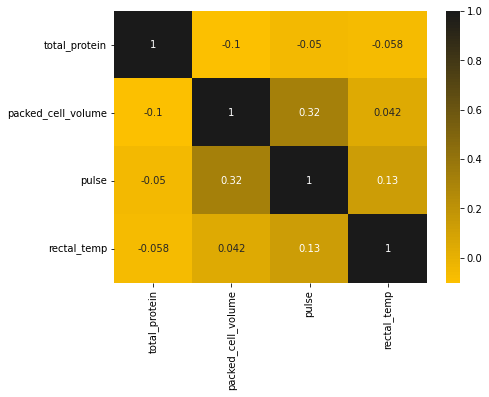

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(X_train.loc[:,['total_protein' ,'packed_cell_volume', 'pulse','rectal_temp']].corr(),cmap=cmap,annot=True)

# Machine Learning

## Revisão bases de treino e teste

Verificando de novo a quantidade de dados nulos em cada atributo

In [40]:
print(X_train.isnull().sum())

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
surgical_lesion          0
rectal_temp              0
pulse                    0
packed_cell_volume       0
total_protein            0
lesion_1_A               0
lesion_1_B               0
lesion_1_C               0
lesion_1_D               0
lesion_2_A               0
lesion_2_B               0
lesion_2_C               0
lesion_2_D               0
lesion_3_A               0
lesion_3_B               0
lesion_3_C               0
lesion_3_D               0
dtype: int64


In [41]:
#treino
print(0.8 * data['result'].value_counts()[0])
print(0.8 * data['result'].value_counts()[1])

#test
print(0.2 * data['result'].value_counts()[0])
print(0.2 * data['result'].value_counts()[1])

# Verificar proporções. amostragem estratificada
print('\n\tFull DB balance\n',data['result'].value_counts())
print('\n\tTrain balance\n',y_train.value_counts())
print('\n\tTest balance\n',y_test.value_counts())

173.60000000000002
119.2
43.400000000000006
29.8

	Full DB balance
 lived    217
died     149
Name: result, dtype: int64

	Train balance
 lived    173
died     119
Name: result, dtype: int64

	Test balance
 lived    44
died     30
Name: result, dtype: int64


## Preprocessamento

Codificação de Dados categóricos

In [42]:
# Trasnformar inputs categóricos em numérico: dummy coding

categorical = X_train.loc[:,X_train.dtypes ==object]
numeric = X_train.loc[:,X_train.dtypes !=object]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoder.fit(categorical.loc[:,categorical.columns != 'result']) 

categorical = encoder.transform(categorical)
categorical = pd.DataFrame(categorical.toarray())
X_train = pd.concat([categorical, numeric], axis=1)

print('Shape after encodig',X_train.shape)

# Trasnformar inputs categóricos em numérico: dummy coding
categorical = X_test.loc[:,X_test.dtypes ==object]
numeric = X_test.loc[:,X_test.dtypes !=object]

categorical = encoder.transform(categorical)
categorical = pd.DataFrame(categorical.toarray())
X_test = pd.concat([categorical, numeric], axis=1)

print('Shape after encodig',X_test.shape)

X_train.columns = X_train.columns.map(str)
X_test.columns = X_test.columns.map(str)

Shape after encodig (292, 52)
Shape after encodig (74, 52)


Normalização 

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Criação de Funções adicionais para avaliação

In [44]:
def model_fnc(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train);

  modelscore = model.score(X_train, y_train);

  print('>>\tModel Score',round(modelscore*100,2),'%')

  y_pred = model.predict(X_test)

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', round(accuracy,4))

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', round(kappa,4))

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average="binary", pos_label="lived")
  print('F1: ', round(f1,4))

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)
  cM = pd.DataFrame(confMatrix, index=['Previsto morreu', 'Previsto sobreviveu'], columns=['Real morreu', 'Real sobreviveu'])
  print(cM,'\n\n')

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f",cmap=cmap_creator(Color))
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['morreu', 'sobreviveu']) 
  ax.yaxis.set_ticklabels(['morreu', 'sobreviveu'])
  plt.show()
  return accuracy , kappa , f1


from sklearn.metrics import f1_score, make_scorer
f1_binary = make_scorer(f1_score, average="binary", pos_label="lived")

In [45]:
models_av = {}
cols = ['modelo','accuracy' , 'kappa' , 'f1']
models_av['modelo']=[]
models_av['accuracy']=[]
models_av['kappa']=[]
models_av['f1']=[]

# Modelos de Classificação


## Árvore de Decisão

>>	Model Score 90.07 %
Acurácia:  0.7703
Kappa:  0.5405
F1:  0.7901
                     Real morreu  Real sobreviveu
Previsto morreu               25               12
Previsto sobreviveu            5               32 




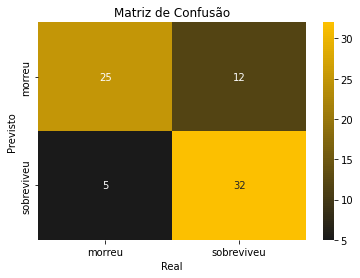

In [46]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
accuracy , kappa , f1 = model_fnc(tree_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('AD')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)



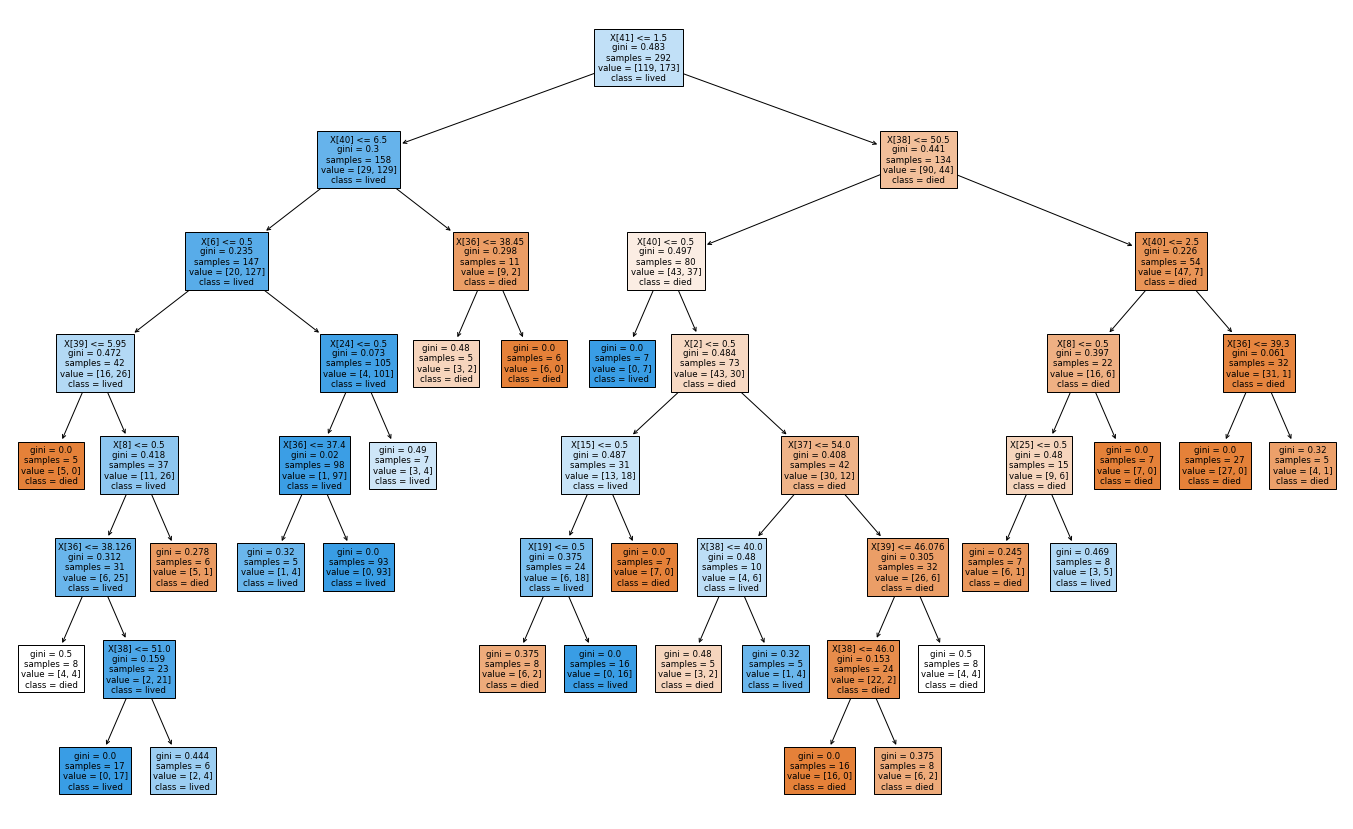

In [47]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(24, 15)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(tree_model, class_names=['died','lived'], filled=True); # plota a árvore


# Tuning 

>>	Model Score 96.77 %
Acurácia:  0.8378
Kappa:  0.6706
F1:  0.8571
                     Real morreu  Real sobreviveu
Previsto morreu               26                8
Previsto sobreviveu            4               36 




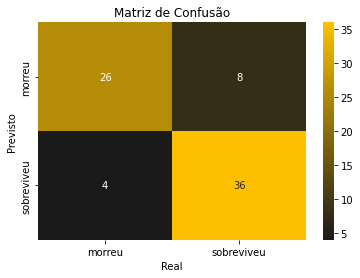

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Parâmetros a serem testados
tuned_parameters = [{'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

print("# Tuning \n")

tree_model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(tree_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('AD tuned')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

In [49]:
y_pred = tree_model.predict(X_test) #inferência do teste

unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequência:")
print(np.asarray((unique_elements, counts_elements)))

Frequência:
[['died' 'lived']
 [30 44]]


## SVM

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


>>	Model Score 80.48 %
Acurácia:  0.7703
Kappa:  0.5051
F1:  0.8211
                     Real morreu  Real sobreviveu
Previsto morreu               18                5
Previsto sobreviveu           12               39 




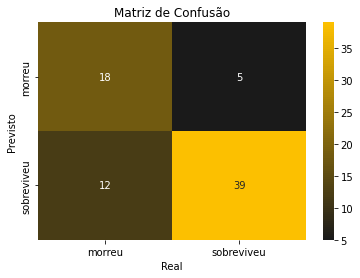

In [50]:
from sklearn.svm import LinearSVC
seed = 77
svm_model = LinearSVC(max_iter= 10_000, random_state=seed) #overfitting
accuracy , kappa , f1 = model_fnc(svm_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('SVM')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

## Random Forest

>>	Model Score 97.6 %
Acurácia:  0.8919
Kappa:  0.7758
F1:  0.9091
                     Real morreu  Real sobreviveu
Previsto morreu               26                4
Previsto sobreviveu            4               40 




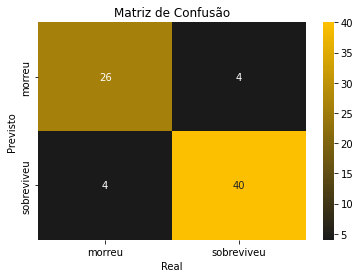

In [51]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(min_samples_leaf=2, random_state=seed) # tente mudar parâmetro para evitar overfitting
accuracy , kappa , f1 = model_fnc(RF_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('RF')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [3,4,8,9,10,11]}]

print("# Tuning")
print()

RF_model = GridSearchCV(RandomForestClassifier(n_jobs=50, verbose=1, min_samples_leaf=3), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(RF_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('RF tuned')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

# Tuning



[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:   11.9s remaining:   35.6s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:   16.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:    2.6s remaining:    7.9s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.2s remaining:    1.5s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent worker

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors =2
KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
accuracy , kappa , f1 = model_fnc(KNN_model, X_train, X_test, y_train, y_test)
models_av['modelo'].append('KNN')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

In [ ]:
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'weights': ['uniform', 'distance']}]

print("# Tuning \n")

KNN_model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(KNN_model, X_train, X_test, y_train, y_test)

models_av['modelo'].append('KNN tuned')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

## Logistic Regression

In [ ]:
# treinar modelo
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
accuracy , kappa , f1 = model_fnc(LR_model, X_train, X_test, y_train, y_test)
models_av['modelo'].append('LR')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


In [ ]:
# Parâmetros a serem testados
tuned_parameters = [{'C': [0.1, 1.0, 10]}]

print("# Tuning ")
print()

LR_model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(LR_model, X_train, X_test, y_train, y_test)
models_av['modelo'].append('LR tuned')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


In [ ]:
LR_model.best_estimator_


# Modelos de ML com Base de Dados Normalizada

In [ ]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
accuracy , kappa , f1 = model_fnc(tree_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('AD Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)

tuned_parameters = [{'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

print("# Tuning \n")

tree_model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(tree_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('AD tuned Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)



svm_model = LinearSVC(max_iter= 10_000, random_state=seed) #overfitting
accuracy , kappa , f1 = model_fnc(svm_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('SVM Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)



RF_model = RandomForestClassifier(min_samples_leaf=2, random_state=seed) # tente mudar parâmetro para evitar overfitting
accuracy , kappa , f1 = model_fnc(RF_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('RF  Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [3,4,8,9,10,11]}]

print("# Tuning")
print()

RF_model = GridSearchCV(RandomForestClassifier(n_jobs=50, verbose=1, min_samples_leaf=3), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(RF_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('RF tuned  Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


n_neighbors =2
KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
accuracy , kappa , f1 = model_fnc(KNN_model, X_train_scaled , X_test_scaled , y_train, y_test)
models_av['modelo'].append('KNN Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'weights': ['uniform', 'distance']}]

print("# Tuning \n")

KNN_model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(KNN_model, X_train_scaled , X_test_scaled , y_train, y_test)

models_av['modelo'].append('KNN tuned Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)



LR_model = LogisticRegression()
accuracy , kappa , f1 = model_fnc(LR_model, X_train_scaled , X_test_scaled , y_train, y_test)
models_av['modelo'].append('LR Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)



tuned_parameters = [{'C': [0.1, 1.0, 10]}]

print("# Tuning ")
print()

LR_model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring=f1_binary)
accuracy , kappa , f1 = model_fnc(LR_model, X_train_scaled , X_test_scaled , y_train, y_test)
models_av['modelo'].append('LR tuned Sc')
models_av['accuracy'].append(accuracy)
models_av['kappa'].append(kappa)
models_av['f1'].append(f1)


# Apresentação de Resultados de Avaliação

In [ ]:
models_av = pd.DataFrame(models_av,columns = cols)
models_av = models_av.sort_values(by = 'f1',ascending=False)
models_av.style


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(models_av['modelo'],models_av['accuracy'],'.-',label='accuracy',color=cmap[0])
plt.plot(models_av['modelo'],models_av['f1'],'.-',label='f1',color=cmap[50])
plt.plot(models_av['modelo'],models_av['kappa'],'.-',label='kappa',color='black')
plt.ylabel('Nível de métrica')
plt.title('Comparação de Métricas dos Modelos')
plt.xticks(rotation = 45, ha='right')
plt.legend()
plt.grid(True)
plt.show()